In [4]:
from astropy import units as u
from synphot import units, SourceSpectrum
from synphot.models import BlackBodyNorm1D, GaussianFlux1D

In [5]:
g_abs = SourceSpectrum(GaussianFlux1D, amplitude=1*u.mJy,
                       mean=4000, stddev=20)
g_em = SourceSpectrum(GaussianFlux1D,
                      total_flux=3.5e-13*u.erg/(u.cm**2 * u.s),
                      mean=3000, fwhm=100)
bb = SourceSpectrum(BlackBodyNorm1D, temperature=6000)

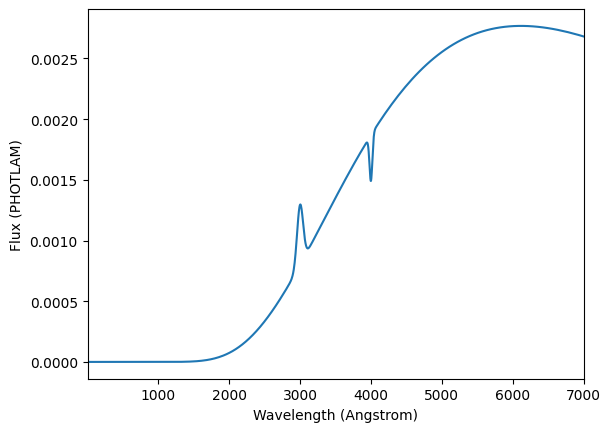

In [6]:
sp = 2 * bb + g_em - g_abs
sp.plot(left=1, right=7000)

In [ ]:
g_abs.plot(left=3000,right=8000)

In [ ]:
sp(0.3 * u.micron)


In [ ]:
sp(0.3 * u.micron, flux_unit=units.FLAM)

In [ ]:
sp(sp.waveset)

In [ ]:
print(sp)

In [ ]:
sp.z = 0.2
print(sp)

In [ ]:
from synphot import SpectralElement
from synphot.models import Box1D
bp = SpectralElement(Box1D, amplitude=1, x_0=4000, width=2000)

In [ ]:
sp_rn = sp.normalize(1 * u.Jy, band=bp)
sp_rn.integrate()

In [ ]:
from synphot import Observation
obs = Observation(sp_rn, bp)

In [ ]:
import numpy as np
area = np.pi* (1 * u.m) ** 2
area
obs.countrate(area=area)